In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_empenhos = pd.read_csv('../procurement_auction_data/Empenhos.csv', encoding='ISO-8859-1', sep=';')
df_empenhos.head()

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Código Empenho,Data Emissão Empenho,Observação Empenho,Valor Empenho (R$)
0,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,170120000012013NE800001,NaN,Sem informação,"0,00"
1,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,170120000012014NE800013,08/01/2014,ATENDER DESPESAS COM SERVICOS DE MANUTENCAO EM...,"10,00"
2,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,170120000012015NE800019,14/01/2015,ATENDER DESPESAS COM SERVICOS DE MANUTENCAO EM...,"10,00"
3,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,510918572022013NE800003,NaN,Sem informação,"0,00"
4,12012,580025,SUPERINT.FED.DE PESCA E AQUICULTURA/PB,5,Pregão,00365001949201230,580025000012013NE800001,NaN,Sem informação,"0,00"


Top 10 Observações Empenho by total value:
Observação Empenho
Informação protegida por sigilo nos termos da legislação vigente                                                                                                                                                                          8.525781e+08
ATENDER DESPESA COM O PRIMEIRO TERMO ADITIVO AO CONTRATO 10/2016 - SERVICOS  GRAFICOS ENEM 2017.                              PROCESSO 23036.002582/2015-41. PROC ORIGEM: 2016PR00006                                                     2.100000e+08
COMPLEMENTO REF A SERVICO DE APOIO ADM E TECNICO.               OF 2019.2169 (F). VALOR TOTAL DO CONTRATO: RS 304.113.338,38         CONTRATO 223/2017 // UASG 254445 // PROC ORIGEM: 2017PR00318                                         1.969345e+08
ATENDER DESPESA COM SERVICOS ESPECIALIZADOS DE IMPLEMENTACAO, GERENCIAMENTO E ADMINISTRACAO DOS AUXILIOS ALIMENTACAO E REFEICAO VIA CARTAO ELETRONICO    P/ REDE EBSERH - UASG.155007 - PREGAO 14/201

/var/folders/ph/58c8ymvn44b20qwv_6w1170w0000gn/T/ipykernel_96367/1266463134.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


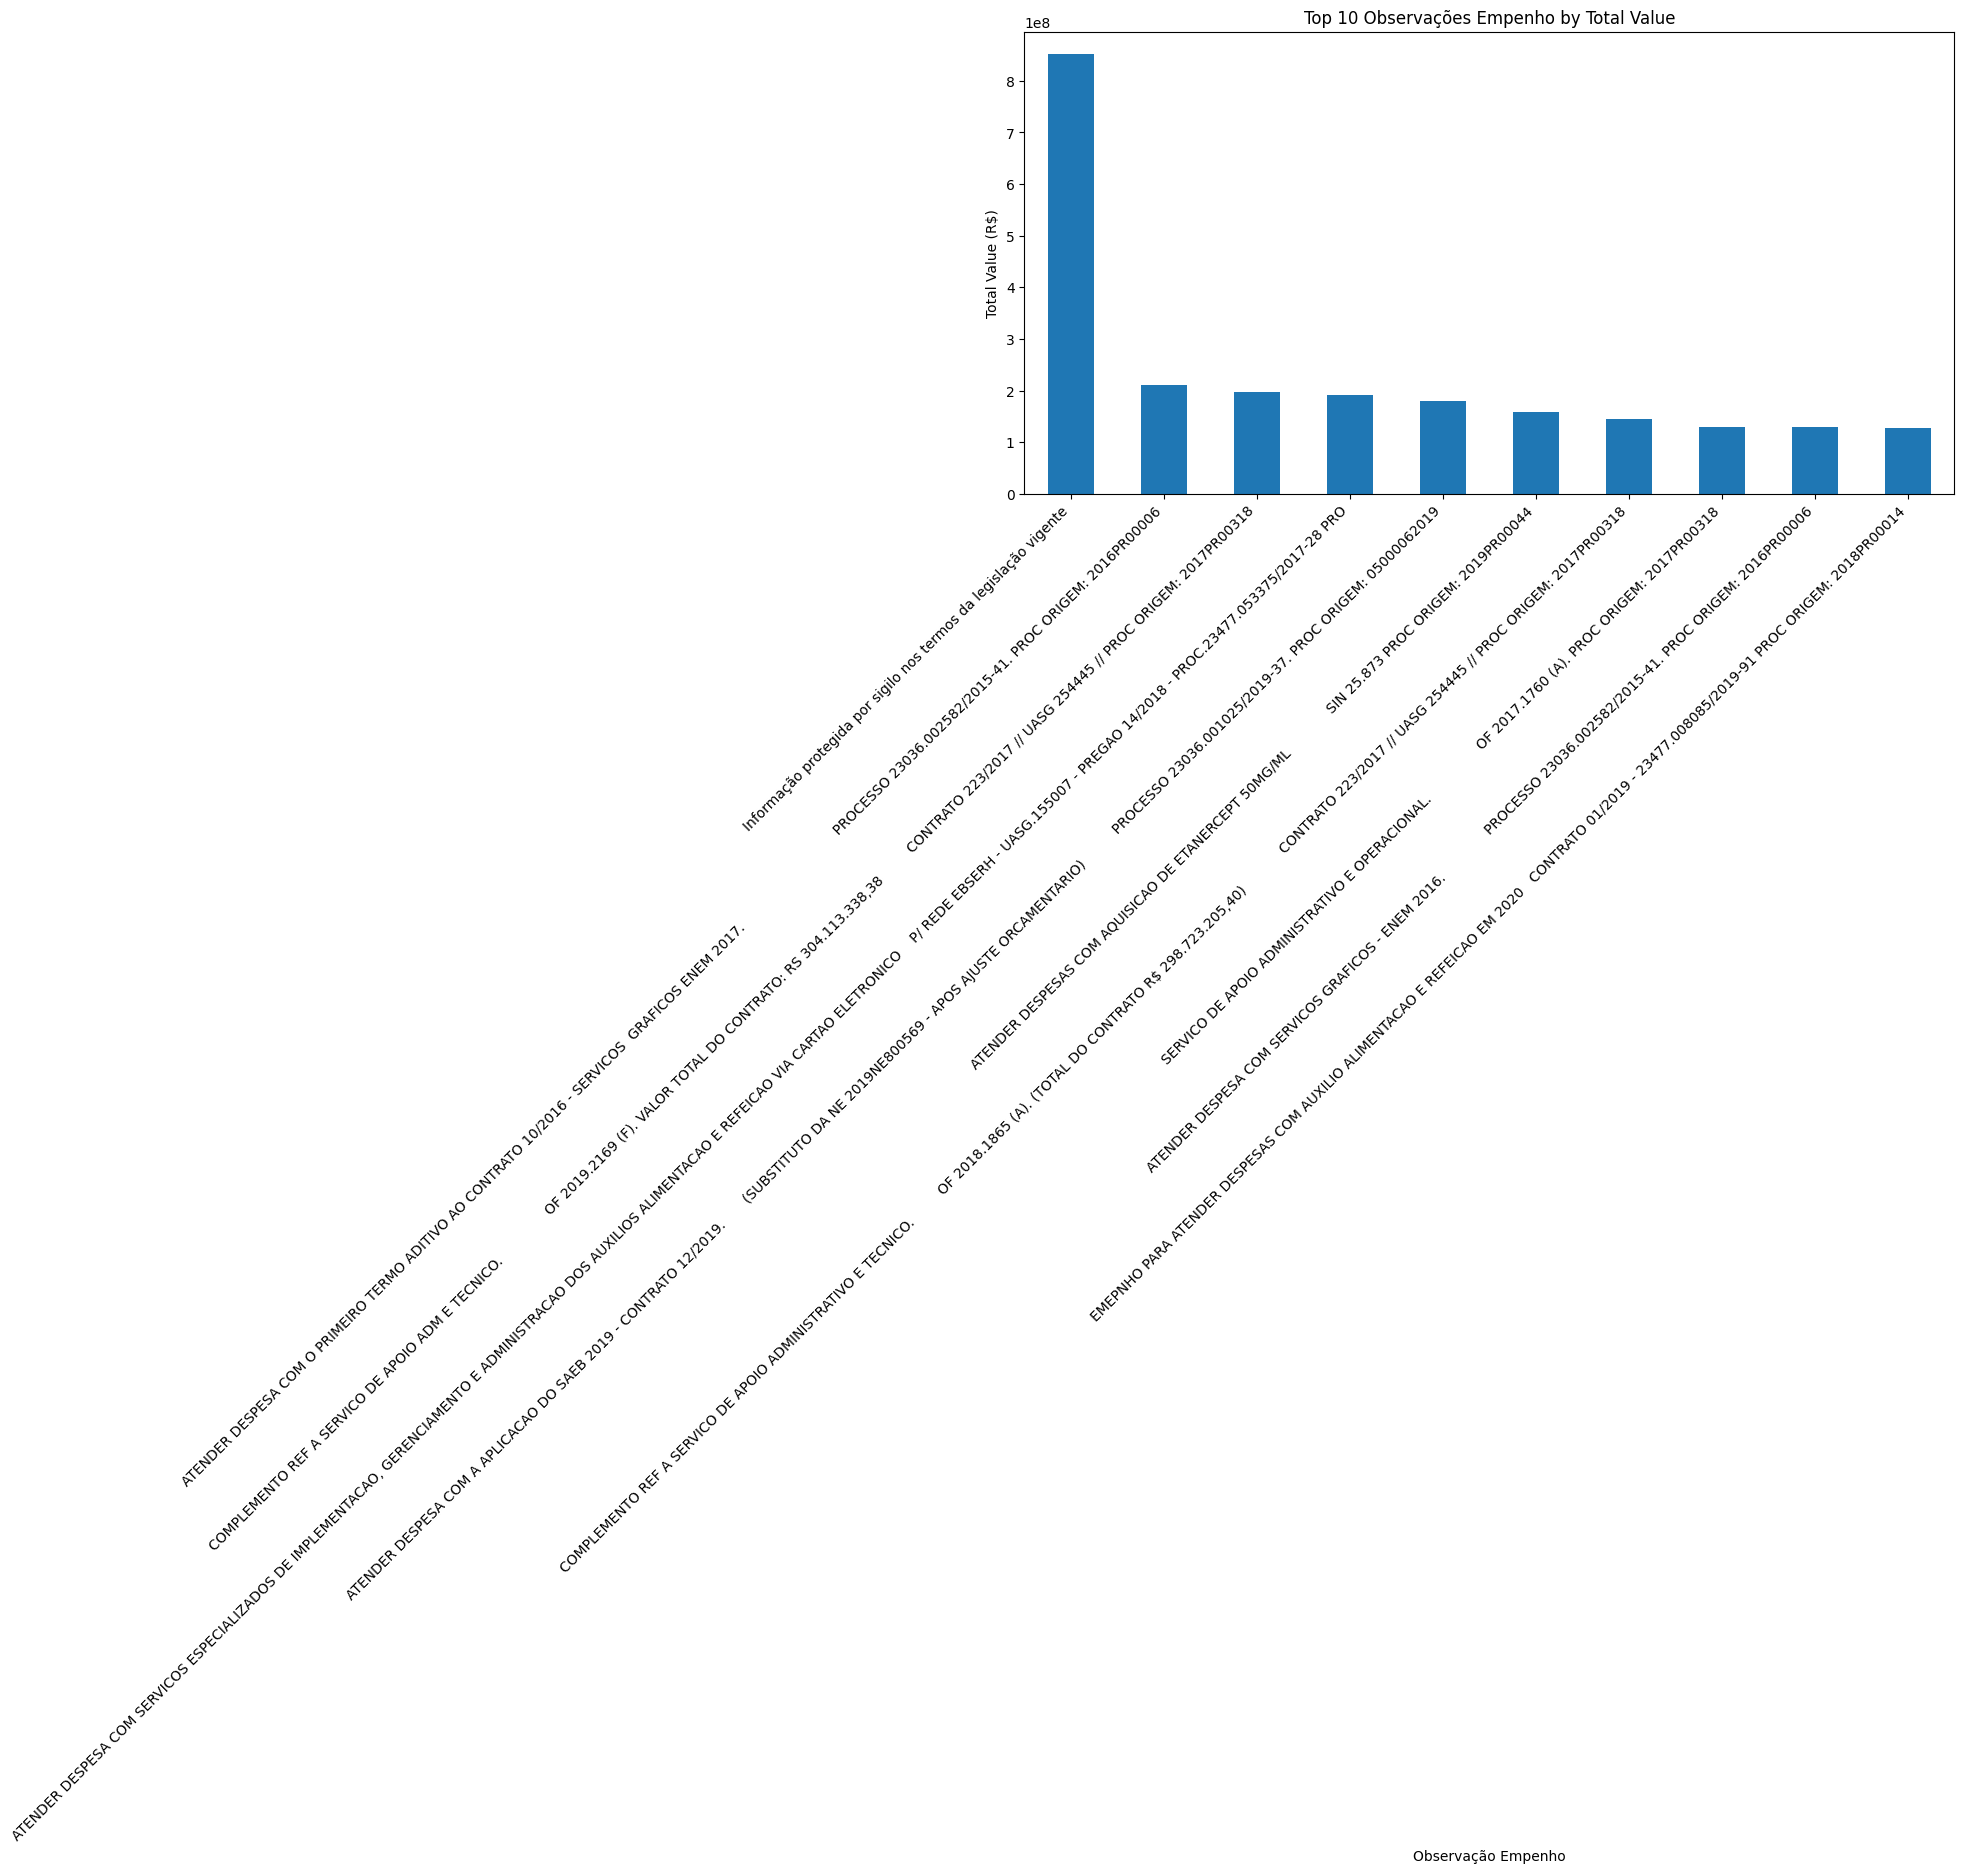

In [3]:
# Convert Valor Empenho to numeric, replacing comma with dot and handling any non-numeric values
df_empenhos['Valor Empenho (R$)'] = pd.to_numeric(df_empenhos['Valor Empenho (R$)'].str.replace(',', '.'), errors='coerce')

# Group by Observação Empenho and sum the values
top_observacoes = df_empenhos.groupby('Observação Empenho')['Valor Empenho (R$)'].sum().sort_values(ascending=False)

# Display top 10 observations with highest values
print("Top 10 Observações Empenho by total value:")
print(top_observacoes.head(10))

# Create a bar plot of top 10 observations
plt.figure(figsize=(12, 6))
top_observacoes.head(10).plot(kind='bar')
plt.title('Top 10 Observações Empenho by Total Value')
plt.xlabel('Observação Empenho')
plt.ylabel('Total Value (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()